In [1]:
import cv2
import pywt
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def load_images_from_folder(path=None, img_width=224, img_height=224):
    try:
        images = []
        for filename in os.listdir(path):
            file_path = os.path.join(path, filename)
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            if img is not None:
                img = cv2.resize(img, (img_width, img_height))
                images.append(img)

        return np.array(images)
    except Exception as e:
        print(f"Error has occurred during data loading: {e}")

In [3]:
train_n_dir = "/home/khalil.alblooshi/labs/AI701/Project 3/denoising-pneumonia/noisy_data/train/NORMAL"
train_p_dir = "/home/khalil.alblooshi/labs/AI701/Project 3/denoising-pneumonia/noisy_data/train/PNEUMONIA"
val_n_dir = "/home/khalil.alblooshi/labs/AI701/Project 3/denoising-pneumonia/noisy_data/val/NORMAL"
val_p_dir = "/home/khalil.alblooshi/labs/AI701/Project 3/denoising-pneumonia/noisy_data/val/PNEUMONIA"
test_n_dir = "/home/khalil.alblooshi/labs/AI701/Project 3/denoising-pneumonia/noisy_data/test/NORMAL"
test_p_dir = "/home/khalil.alblooshi/labs/AI701/Project 3/denoising-pneumonia/noisy_data/test/PNEUMONIA"


train_n_img = load_images_from_folder(train_n_dir)
train_p_img = load_images_from_folder(train_p_dir)

val_n_img = load_images_from_folder(val_n_dir)
val_p_img = load_images_from_folder(val_p_dir)

test_n_img = load_images_from_folder(test_n_dir)
test_p_img = load_images_from_folder(test_p_dir)

In [4]:
def wavelet_denoise(image, wavelet='db4', level=100):

    coeffs = pywt.wavedec2(image, wavelet, level=level)
    threshold = np.sqrt(2*np.log2(image.size))

    coeffs_H = [coeffs[0]]
    for detail_coeffs in coeffs[1:]:
        coeffs_H.append(tuple(pywt.threshold(c, threshold, mode='soft') for c in detail_coeffs))

    return pywt.waverec2(coeffs_H, wavelet)

In [5]:
def denoise_images(images):
    denoised_images = []
    for image in images:
        denoised_image = wavelet_denoise(image)
        denoised_images.append(denoised_image)
    return denoised_images

In [6]:
# apply denoise
denoised_train_input0 = denoise_images(train_n_img)
denoised_train_input1 = denoise_images(train_p_img)

denoised_val_input0 = denoise_images(val_n_img)
denoised_val_input1 = denoise_images(val_p_img)

denoised_test_input0 = denoise_images(test_n_img)
denoised_test_input1 = denoise_images(test_p_img)

/home/khalil.alblooshi/anaconda3/envs/ai701/lib/python3.8/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 100 is too high: all coefficients will experience boundary effects.
  warnings.warn(


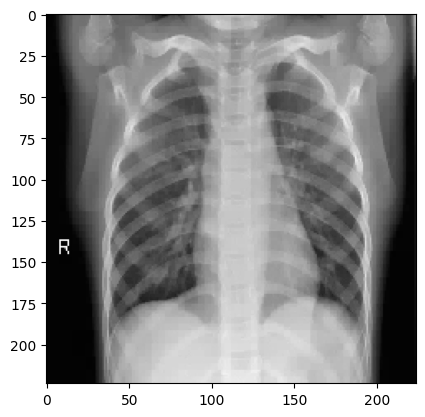

In [7]:
plt.imshow(denoised_train_input0[0], cmap='gray')

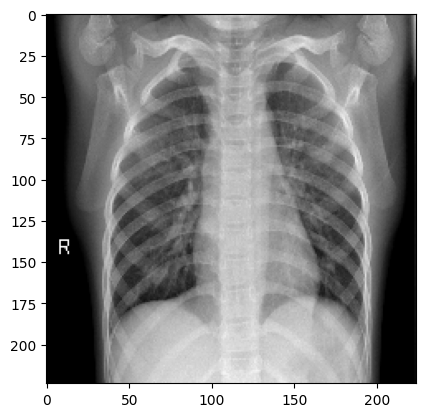

In [8]:
plt.imshow(train_n_img[0], cmap='gray')

In [9]:
def save_denoised_images(images, directory, base_filename):
    os.makedirs(directory, exist_ok=True)
    
    for i, img in enumerate(images):
        img_normalized = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
        img_uint8 = np.uint8(img_normalized)

        cv2.imwrite(f'{directory}/{base_filename}_{i}.png', img_uint8)

In [10]:
save_denoised_images(denoised_train_input0, "/l/users/khalil.alblooshi/wavelet_dataset/train/NORMAL/", 'denoised_train_input')
save_denoised_images(denoised_train_input1, "/l/users/khalil.alblooshi/wavelet_dataset/train/PNEUMONIA/", 'denoised_train_input')

save_denoised_images(denoised_val_input0, '/l/users/khalil.alblooshi/wavelet_dataset/val/NORMAL/', 'denoised_val_input')
save_denoised_images(denoised_val_input1, '/l/users/khalil.alblooshi/wavelet_dataset/val/PNEUMONIA/', 'denoised_val_input')

save_denoised_images(denoised_test_input0, '/l/users/khalil.alblooshi/wavelet_dataset/test/NORMAL/', 'denoised_test_input')
save_denoised_images(denoised_test_input1, '/l/users/khalil.alblooshi/wavelet_dataset/test/PNEUMONIA/', 'denoised_test_input')

_________________________________________ Experiment ground_________________________________________ 

In [11]:
print(train_n_img[0])

[[  0   0   0 ...  95 134 189]
 [  0   0   0 ...  92 130 185]
 [  0   0   0 ...  93 130 185]
 ...
 [  0   0   1 ...   0   0   7]
 [  0   0   2 ...   0   0   5]
 [  0   0   0 ...   0   0   8]]


In [12]:
print(denoised_train_input0[0])

[[  0.21484996   0.21484996   0.21484996 ...  89.02912386 130.0732883
  179.48495942]
 [  0.21484996   0.21484996   0.21484996 ...  89.02912386 130.0732883
  179.48495942]
 [  0.21484996   0.21484996   0.21484996 ...  89.52912386 130.5732883
  178.98495942]
 ...
 [  0.31893858   0.31893858   0.31893858 ...   0.85180288   0.47680288
    2.888474  ]
 [  0.31893858   0.31893858   0.31893858 ...   0.85180288   1.22680288
    2.138474  ]
 [  0.31893858   0.31893858   0.31893858 ...   0.85180288   1.22680288
    2.138474  ]]


In [14]:
def wavelet_denoise_db4(image, wavelet='db4', level=100):

    coeffs = pywt.wavedec2(image, wavelet, level=level)
    threshold = np.sqrt(2*np.log2(image.size))

    coeffs_H = [coeffs[0]]
    for detail_coeffs in coeffs[1:]:
        coeffs_H.append(tuple(pywt.threshold(c, threshold, mode='soft') for c in detail_coeffs))

    return pywt.waverec2(coeffs_H, wavelet)


def wavelet_denoise_sym3(image, wavelet='sym3', level=100):

    coeffs = pywt.wavedec2(image, wavelet, level=level)
    threshold = np.sqrt(2*np.log2(image.size))

    coeffs_H = [coeffs[0]]
    for detail_coeffs in coeffs[1:]:
        coeffs_H.append(tuple(pywt.threshold(c, threshold, mode='soft') for c in detail_coeffs))

    return pywt.waverec2(coeffs_H, wavelet)


def wavelet_denoise_bior13(image, wavelet='bior1.3', level=100):

    coeffs = pywt.wavedec2(image, wavelet, level=level)
    threshold = np.sqrt(2*np.log2(image.size))

    coeffs_H = [coeffs[0]]
    for detail_coeffs in coeffs[1:]:
        coeffs_H.append(tuple(pywt.threshold(c, threshold, mode='soft') for c in detail_coeffs))

    return pywt.waverec2(coeffs_H, wavelet)



In [23]:
original = train_n_img[0]
db1 = wavelet_denoise(train_n_img[0])
db4 = wavelet_denoise_db4(train_n_img[0])
sym3 = wavelet_denoise_sym3(train_n_img[0])
bior13 = wavelet_denoise_bior13(train_n_img[0])

/home/khalil.alblooshi/anaconda3/envs/ai701/lib/python3.8/site-packages/pywt/_multilevel.py:43: UserWarning: Level value of 100 is too high: all coefficients will experience boundary effects.
  warnings.warn(


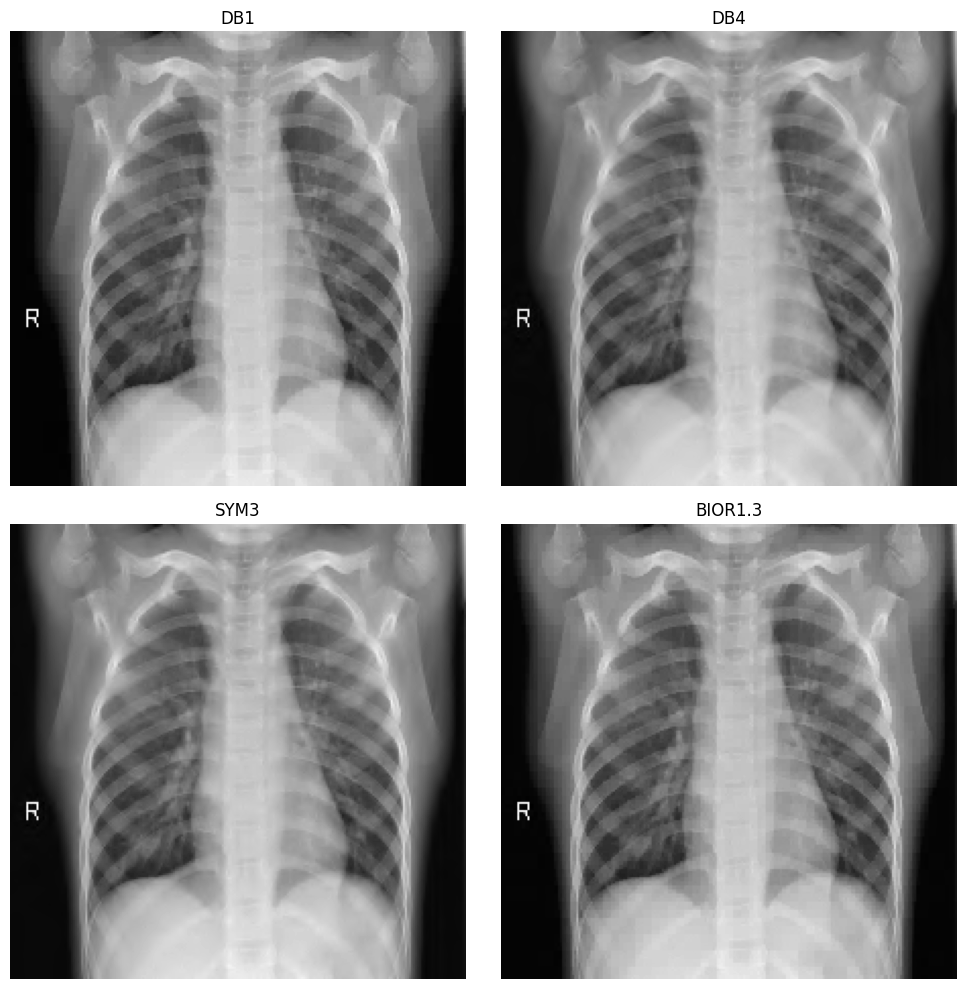

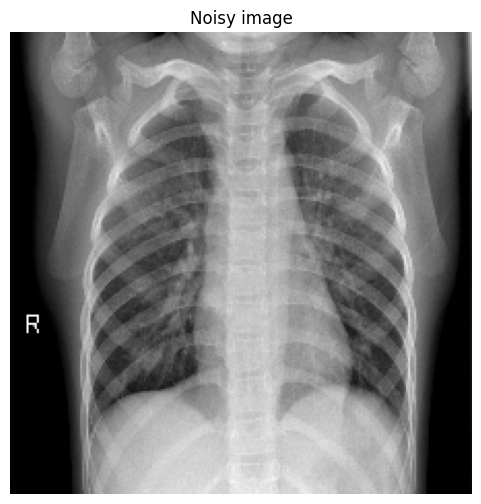

In [27]:
import matplotlib.pyplot as plt

# Assuming db1, db4, sym3, bior13, and fifth_image are your images
# Ensure these are numpy arrays and in a format suitable for display

# First plot with 2x2 grid for the first four images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Adjust the size as needed

# Plot each of the first four images in a subplot
axs[0, 0].imshow(db1, cmap='gray')
axs[0, 0].set_title('DB1')
axs[0, 0].axis('off')

axs[0, 1].imshow(db4, cmap='gray')
axs[0, 1].set_title('DB4')
axs[0, 1].axis('off')

axs[1, 0].imshow(sym3, cmap='gray')
axs[1, 0].set_title('SYM3')
axs[1, 0].axis('off')

axs[1, 1].imshow(bior13, cmap='gray')
axs[1, 1].set_title('BIOR1.3')
axs[1, 1].axis('off')

plt.tight_layout()  # Adjust the layout
plt.show()

# Separate figure for the fifth image
plt.figure(figsize=(6, 6))  # Adjust the size as needed
plt.imshow(original, cmap='gray')  # Replace 'fifth_image' with your actual fifth image variable
plt.title('Noisy image')
plt.axis('off')
plt.show()


Considering db4 as it seem to produce better denoising results than that of the others.